# Berlin Airbnb Data Visualization and Analysis

This notebook provides comprehensive visualizations and analysis of Berlin Airbnb listings data. The analysis covers price distributions, geographical patterns, host behavior, and correlations between key features.

## Objectives:
- Analyze price distributions and patterns across Berlin
- Explore geographical distribution of listings and prices
- Investigate host behavior and multi-listing patterns
- Examine relationships between key features (price, room type, location, reviews)
- Generate interactive maps and comprehensive reports

## 1. Setup and Data Loading

Setting up the environment, importing required libraries, and loading the cleaned dataset.

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define project paths
PROJECT_ROOT = Path.cwd().parent  # Go up from notebooks/ to project root
DATA_DIR = PROJECT_ROOT / "data" 
OUT_DIR = PROJECT_ROOT / "output"
OUT_FIG_DIR = OUT_DIR / "figures"
OUT_MAP_DIR = OUT_DIR / "maps"

# Create output directories if they don't exist
OUT_DIR.mkdir(exist_ok=True)
OUT_FIG_DIR.mkdir(exist_ok=True)
OUT_MAP_DIR.mkdir(exist_ok=True)

# Load the cleaned dataset
CLEAN_CSV = DATA_DIR / "listings_cleaned.csv"

try:
    df = pd.read_csv(CLEAN_CSV)
    print(f"✅ Loaded cleaned dataset: {df.shape[0]:,} listings with {df.shape[1]} features")
    print(f"📊 Dataset columns: {', '.join(df.columns[:10])}{'...' if len(df.columns) > 10 else ''}")
except FileNotFoundError:
    print(f"❌ Cleaned dataset not found at {CLEAN_CSV}")
    print("💡 Please run the data cleaning notebook (01_data_cleaning.ipynb) first")
    # Fallback to original dataset if cleaned version not available
    df = pd.read_csv(DATA_DIR / "listings.csv")
    print(f"📥 Loaded original dataset: {df.shape[0]:,} listings")

# Helper function for saving figures
def savefig(path, dpi=300, bbox_inches='tight'):
    """Save figure with consistent settings"""
    plt.savefig(path, dpi=dpi, bbox_inches=bbox_inches)
    print(f"💾 Saved: {path}")

# Display basic dataset info
print(f"\n📋 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
if 'price' in df.columns:
    print(f"Price range: €{df['price'].min():.0f} - €{df['price'].max():.0f}")
    print(f"Average price: €{df['price'].mean():.0f}")

✅ Loaded cleaned dataset: 9,003 listings with 18 features
📊 Dataset columns: id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price...

📋 Dataset Overview:
Shape: (9003, 18)
Memory usage: 4.7 MB
Price range: €28 - €659
Average price: €132


## 2. Price Analysis

Analyzing the distribution of listing prices in Berlin, both in linear and logarithmic scales.

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\price_hist_linear.png


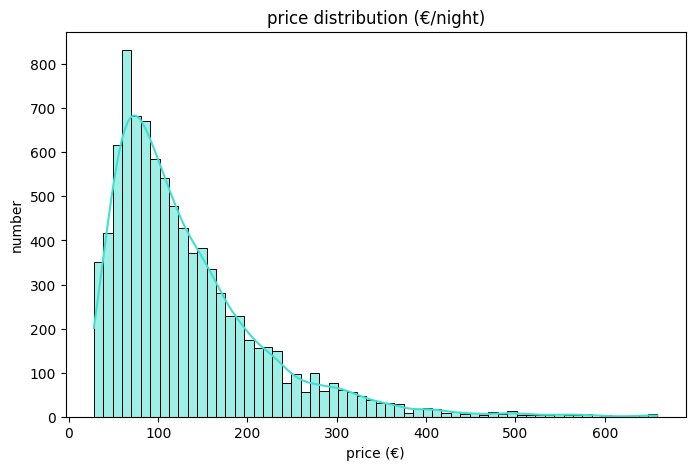

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\price_hist_log.png


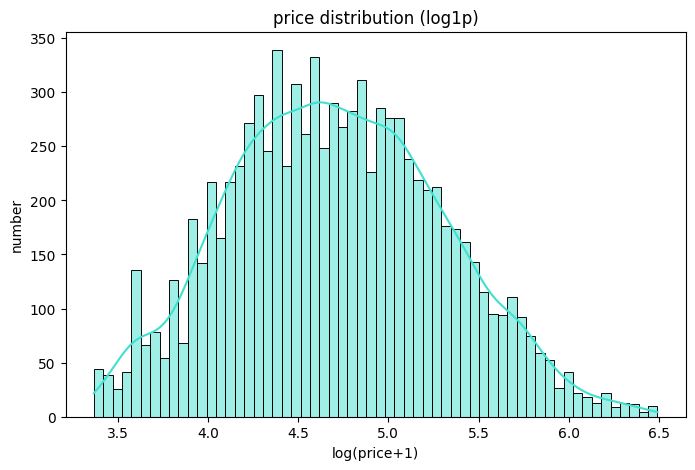

In [20]:
# Price distribution analysis
if "price" in df.columns:
    fig = plt.figure(figsize=(8,5))
    if sns:
        sns.histplot(df["price"], kde=True, bins=60, color='turquoise')
    else:
        plt.hist(df["price"], bins=60, color='turquoise')
    plt.title("price distribution (€/night)")
    plt.xlabel("price (€)")
    plt.ylabel("number")
    savefig(OUT_FIG_DIR / "price_hist_linear.png")
    plt.show()

    fig = plt.figure(figsize=(8,5))
    if sns:
        sns.histplot(np.log1p(df["price"]), kde=True, bins=60, color='turquoise')
    else:
        plt.hist(np.log1p(df["price"]), bins=60, color='turquoise')
    plt.title("price distribution (log1p)")
    plt.xlabel("log(price+1)")
    plt.ylabel("number")
    savefig(OUT_FIG_DIR / "price_hist_log.png")
    plt.show()

## 3. Price vs Room Type Analysis

Examining how prices vary across different room types (entire home/apt, private room, shared room, etc.).

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\price_by_room_type_box.png



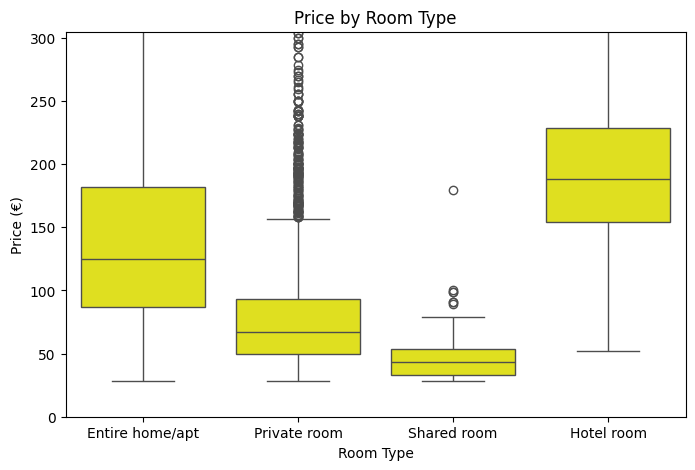

In [21]:
# Price by room type analysis
fig = plt.figure(figsize=(8,5))
plot_df = df[["price","room_type"]]
y_max = plot_df["price"].quantile(0.95)
sns.boxplot(data=plot_df, x="room_type", y="price", color='yellow')
plt.ylim(0, y_max)
plt.title("Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (€)")
savefig(OUT_FIG_DIR / "price_by_room_type_box.png")
plt.show()

## 4. Geographical Analysis - Neighbourhood Groups

Analyzing the distribution of listings and prices across different neighbourhood groups in Berlin.

,n_listings,count
0,Mitte,2002
1,Friedrichshain-Kreuzberg,1877
2,Pankow,1372
3,Charlottenburg-Wilm.,1072
4,Neukölln,726
5,Tempelhof - Schöneberg,623
6,Treptow - Köpenick,448
7,Steglitz - Zehlendorf,271
8,Lichtenberg,256
9,Reinickendorf,143


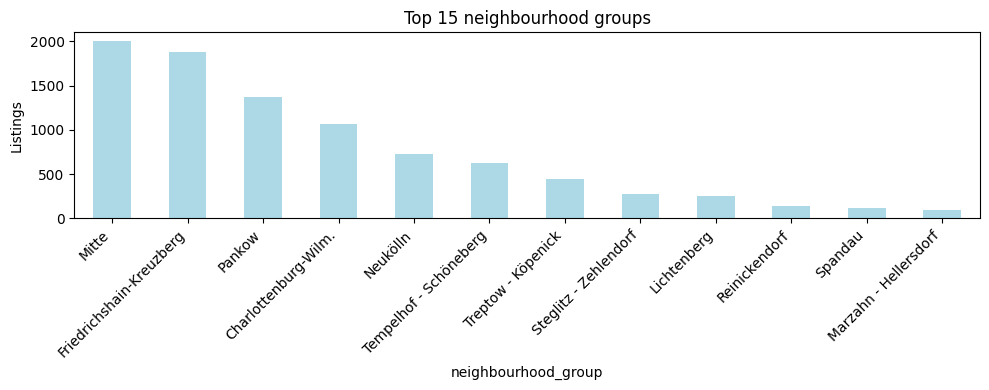

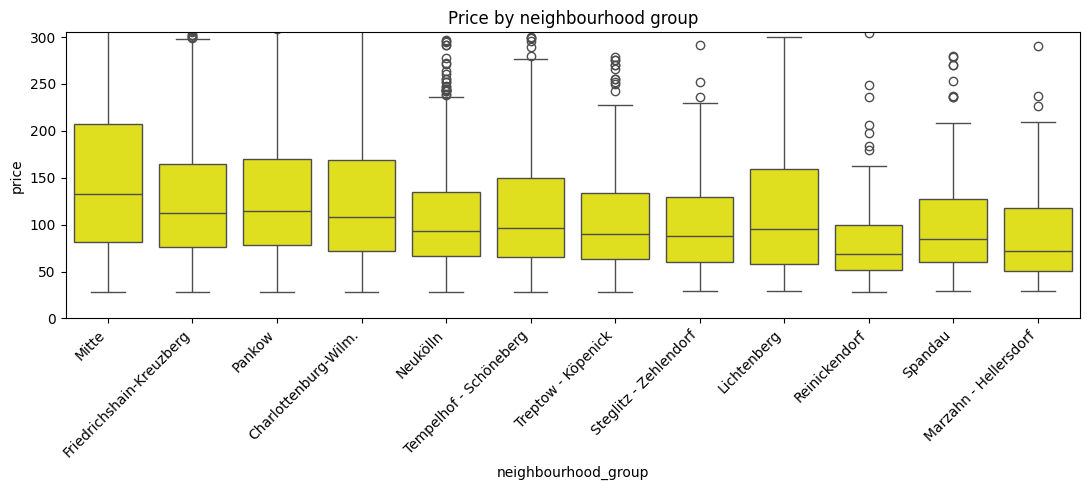

In [22]:
# Top neighbourhood groups analysis
topN = 15
counts_grp = df["neighbourhood_group"].fillna("Missing").value_counts().head(topN)
display(counts_grp.reset_index().rename(columns={"index":"neighbourhood_group",
                                                 "neighbourhood_group":"n_listings"}))

plt.figure(figsize=(10,4))
counts_grp.plot(kind="bar", color='lightblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Listings")
plt.title(f"Top {topN} neighbourhood groups")
plt.tight_layout()
plt.savefig(OUT_FIG_DIR / "top_neighbourhood_groups_count.png", dpi=150)
plt.show()

sub_grp = df[["neighbourhood_group","price"]]
plt.figure(figsize=(11,5))
import seaborn as sns
sns.boxplot(data=sub_grp, x="neighbourhood_group", y="price", order=counts_grp.index, color='yellow')
plt.ylim(0, sub_grp["price"].quantile(0.95))
plt.title("Price by neighbourhood group")
plt.xticks(rotation=45, ha="right") # rotate x-labels
plt.tight_layout()
plt.savefig(OUT_FIG_DIR / "price_by_neighbourhood_group.png", dpi=150)
plt.show()

## 5. Geographical Analysis - Individual Neighbourhoods

Detailed analysis of individual neighbourhoods within Berlin.

,n_listings,count
0,Alexanderplatz,695
1,Frankfurter Allee Süd FK,471
2,Tempelhofer Vorstadt,416
3,Brunnenstr. Süd,380
4,Prenzlauer Berg Südwest,283
5,südliche Luisenstadt,233
6,Schöneberg-Nord,203
7,Reuterstraße,197
8,Prenzlauer Berg Süd,186
9,Prenzlauer Berg Nordwest,182


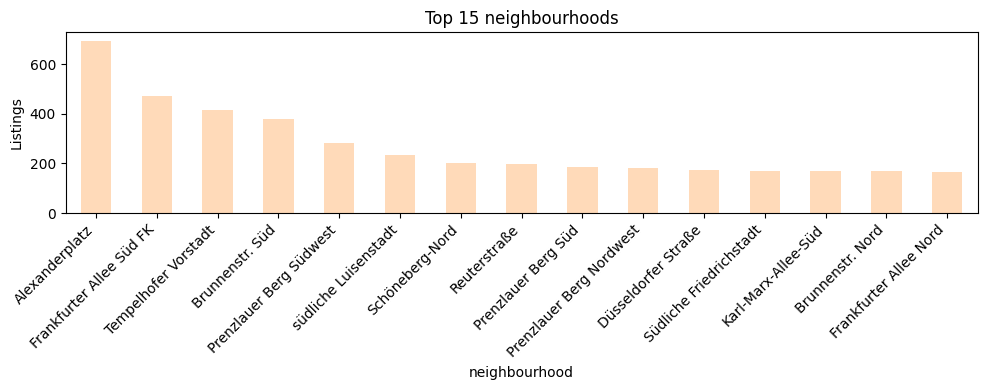

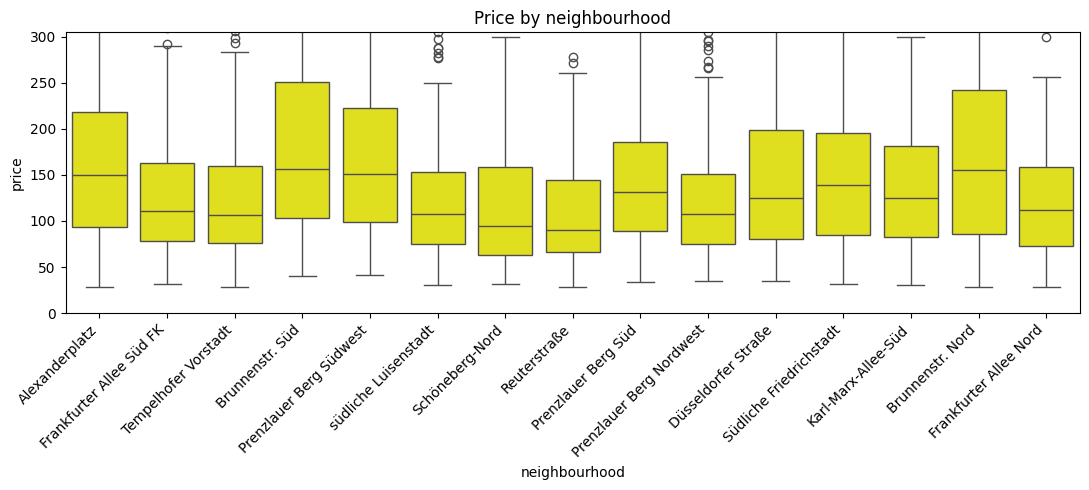

In [23]:
# Top neighbourhoods analysis
counts_nb = df["neighbourhood"].fillna("Missing").value_counts().head(topN)
display(counts_nb.reset_index().rename(columns={"index":"neighbourhood",
                                                "neighbourhood":"n_listings"}))

plt.figure(figsize=(10,4))
counts_nb.plot(kind="bar", color='peachpuff')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Listings")
plt.title(f"Top {topN} neighbourhoods")
plt.tight_layout()
plt.savefig(OUT_FIG_DIR / "top_neighbourhoods_count.png", dpi=150)
plt.show()

sub_nb = df[["neighbourhood","price"]]
plt.figure(figsize=(11,5))
sns.boxplot(data=sub_nb, x="neighbourhood", y="price", order=counts_nb.index, color='yellow')
plt.ylim(0, sub_nb["price"].quantile(0.95))
plt.title("Price by neighbourhood")
plt.xticks(rotation=45, ha="right") # rotate x-labels
plt.tight_layout()
plt.savefig(OUT_FIG_DIR / "price_by_neighbourhood.png", dpi=150)
plt.show()

## 6. Host Behavior Analysis

Comprehensive analysis of host listings count and its relationships with key features like price, room type, neighbourhood, and reviews.


=== HOST LISTINGS COUNT ANALYSIS ===
💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_distribution.png
💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_distribution.png


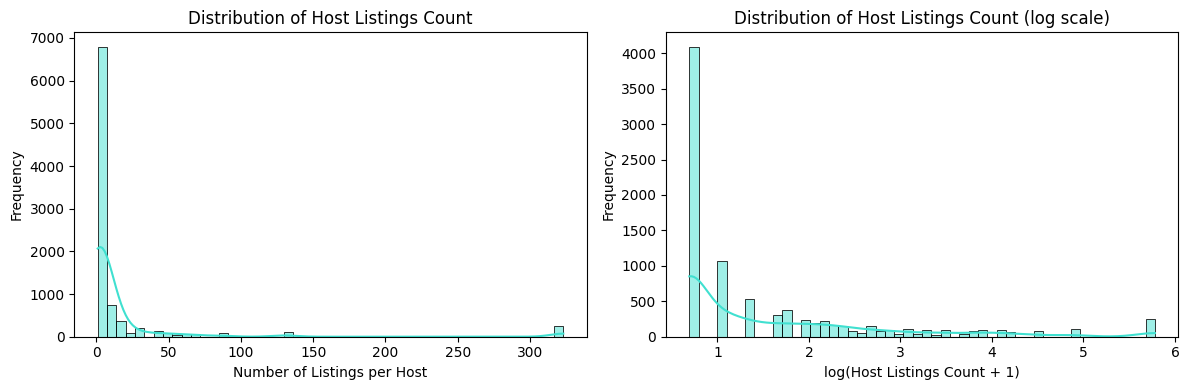

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_vs_price.png


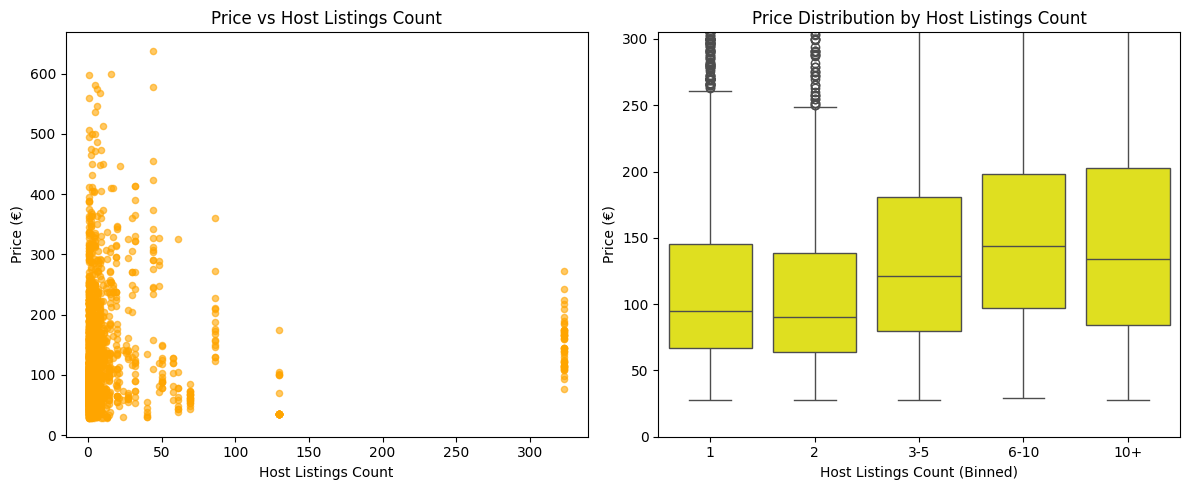

In [24]:
# Host listings analysis - dependencies with other features
if "calculated_host_listings_count" in df.columns:
    print("\n=== HOST LISTINGS COUNT ANALYSIS ===")
    
    # Distribution of host listings count
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df["calculated_host_listings_count"], bins=50, kde=True, color='turquoise')
    plt.title("Distribution of Host Listings Count")
    plt.xlabel("Number of Listings per Host")
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    # Log scale for better visualization
    host_counts_pos = df[df["calculated_host_listings_count"] > 0]["calculated_host_listings_count"]
    sns.histplot(np.log1p(host_counts_pos), bins=50, kde=True, color='turquoise')
    plt.title("Distribution of Host Listings Count (log scale)")
    plt.xlabel("log(Host Listings Count + 1)")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    savefig(OUT_FIG_DIR / "host_listings_distribution.png")
    plt.show()
    
    # Host listings vs Price
    if "price" in df.columns:
        plt.figure(figsize=(12,5))
        
        # Scatter plot
        plt.subplot(1,2,1)
        sample_data = df.sample(min(2000, len(df)), random_state=42)
        plt.scatter(sample_data["calculated_host_listings_count"], sample_data["price"], 
                   alpha=0.6, s=20, color='orange')
        plt.xlabel("Host Listings Count")
        plt.ylabel("Price (€)")
        plt.title("Price vs Host Listings Count")
        
        # Binned analysis
        plt.subplot(1,2,2)
        # Create bins for host listings count
        df['host_listings_bins'] = pd.cut(df["calculated_host_listings_count"], 
                                         bins=[0, 1, 2, 5, 10, float('inf')], 
                                         labels=['1', '2', '3-5', '6-10', '10+'])
        
        sns.boxplot(data=df, x='host_listings_bins', y='price', color='yellow')
        plt.ylim(0, df["price"].quantile(0.95))
        plt.xlabel("Host Listings Count (Binned)")
        plt.ylabel("Price (€)")
        plt.title("Price Distribution by Host Listings Count")
        
        plt.tight_layout()
        savefig(OUT_FIG_DIR / "host_listings_vs_price.png")
        plt.show()
else:
    print("⚠️ Column 'calculated_host_listings_count' not found in the dataset")

### 6.1 Host Listings vs Room Type

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_vs_room_type.png


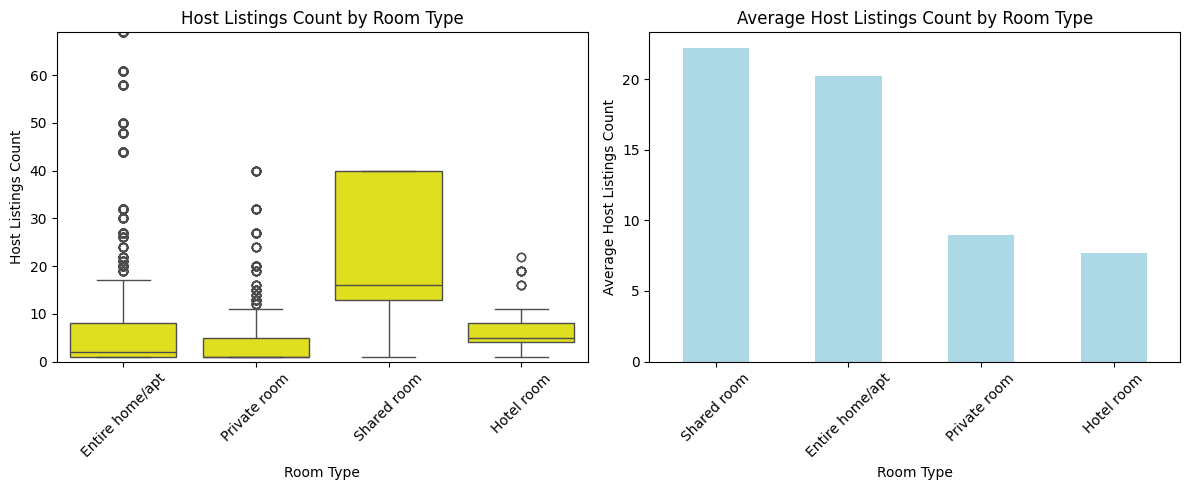

Host Listings Count by Room Type:


calculated_host_listings_count                    
                                          mean median    std count
room_type                                                         
Entire home/apt                          20.24    2.0  62.25  6684
Hotel room                                7.70    5.0   5.45    81
Private room                              8.97    1.0  25.33  2161
Shared room                              22.19   16.0  14.18    77

In [25]:
# Host listings vs Room type
if "calculated_host_listings_count" in df.columns and "room_type" in df.columns:
    plt.figure(figsize=(12,5))
    
    # Count plot
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='room_type', y='calculated_host_listings_count', color='yellow')
    plt.ylim(0, df["calculated_host_listings_count"].quantile(0.95))
    plt.title("Host Listings Count by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Host Listings Count")
    plt.xticks(rotation=45)
    
    # Average by room type
    plt.subplot(1,2,2)
    room_type_avg = df.groupby('room_type')['calculated_host_listings_count'].mean().sort_values(ascending=False)
    room_type_avg.plot(kind='bar', color='lightblue')
    plt.title("Average Host Listings Count by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Average Host Listings Count")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    savefig(OUT_FIG_DIR / "host_listings_vs_room_type.png")
    plt.show()
    
    # Summary table
    room_summary = df.groupby('room_type').agg({
        'calculated_host_listings_count': ['mean', 'median', 'std', 'count']
    }).round(2)
    print("Host Listings Count by Room Type:")
    display(room_summary)

### 6.2 Host Listings vs Neighbourhood and Reviews

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_vs_neighbourhood.png


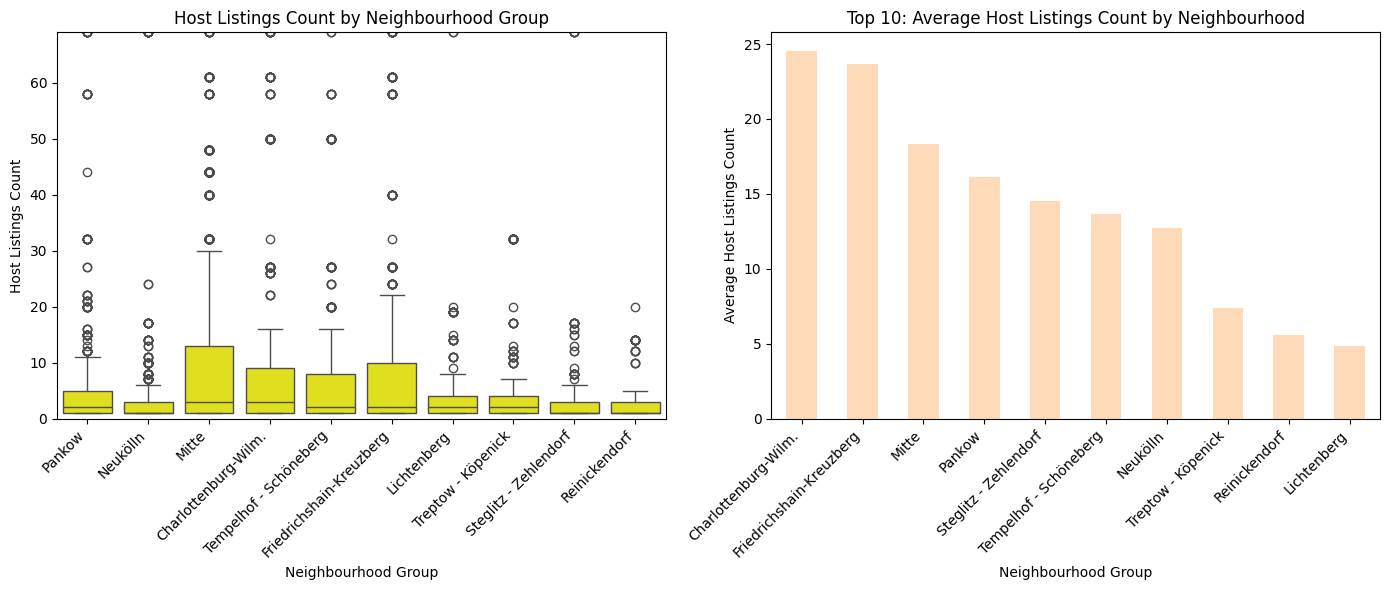

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_vs_reviews.png


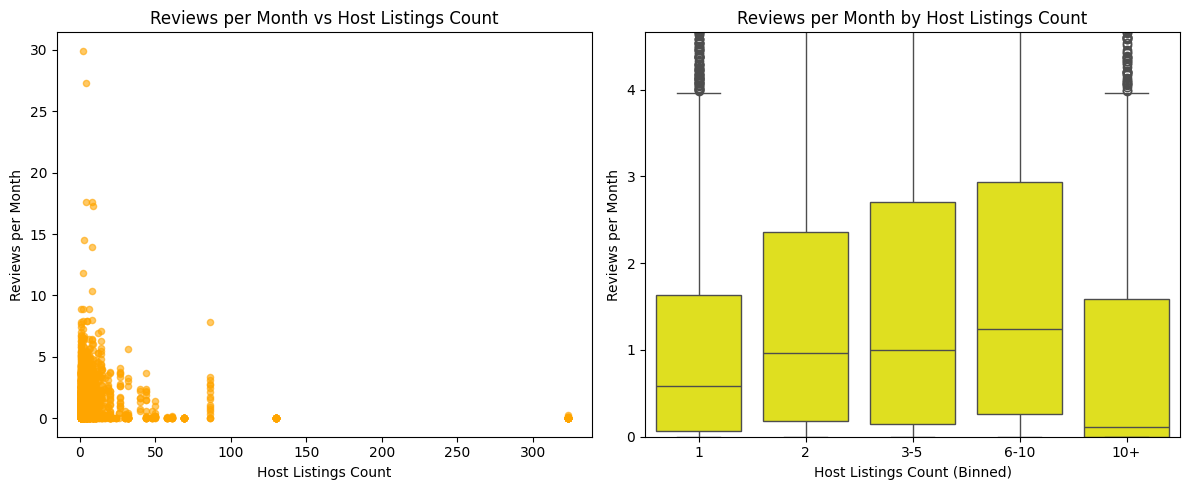

Correlation between Host Listings Count and Reviews per Month: -0.126

=== HOST LISTINGS COUNT SUMMARY STATISTICS ===
count    9003.000000
mean       17.435633
std        55.290499
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       323.000000
Name: calculated_host_listings_count, dtype: float64
💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_correlation_matrix.png
💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\host_listings_correlation_matrix.png


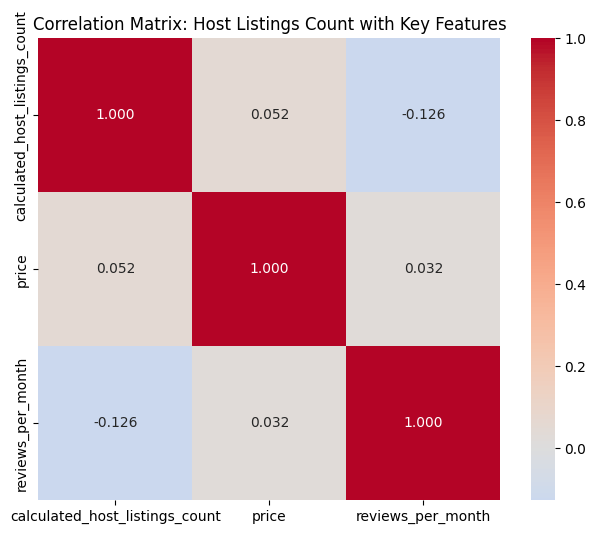

In [26]:
# Host listings vs Neighbourhood group
if "calculated_host_listings_count" in df.columns and "neighbourhood_group" in df.columns:
    plt.figure(figsize=(14,6))
    
    # Box plot for top neighbourhood groups
    top_neighbourhoods = df["neighbourhood_group"].value_counts().head(10).index
    df_top_neigh = df[df["neighbourhood_group"].isin(top_neighbourhoods)]
    
    plt.subplot(1,2,1)
    sns.boxplot(data=df_top_neigh, x='neighbourhood_group', y='calculated_host_listings_count', color='yellow')
    plt.ylim(0, df["calculated_host_listings_count"].quantile(0.95))
    plt.title("Host Listings Count by Neighbourhood Group")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Host Listings Count")
    plt.xticks(rotation=45, ha='right')
    
    # Average by neighbourhood
    plt.subplot(1,2,2)
    neigh_avg = df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean().sort_values(ascending=False).head(10)
    neigh_avg.plot(kind='bar', color='peachpuff')
    plt.title("Top 10: Average Host Listings Count by Neighbourhood")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Average Host Listings Count")
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    savefig(OUT_FIG_DIR / "host_listings_vs_neighbourhood.png")
    plt.show()

# Host listings vs Reviews per month
if "calculated_host_listings_count" in df.columns and "reviews_per_month" in df.columns:
    plt.figure(figsize=(12,5))
    
    # Scatter plot (sample for performance)
    plt.subplot(1,2,1)
    sample_data = df.sample(min(2000, len(df)), random_state=42)
    plt.scatter(sample_data["calculated_host_listings_count"], sample_data["reviews_per_month"], 
               alpha=0.6, s=20, color='orange')
    plt.xlabel("Host Listings Count")
    plt.ylabel("Reviews per Month")
    plt.title("Reviews per Month vs Host Listings Count")
    
    # Binned analysis
    plt.subplot(1,2,2)
    if 'host_listings_bins' not in df.columns:
        df['host_listings_bins'] = pd.cut(df["calculated_host_listings_count"], 
                                         bins=[0, 1, 2, 5, 10, float('inf')], 
                                         labels=['1', '2', '3-5', '6-10', '10+'])
    
    sns.boxplot(data=df, x='host_listings_bins', y='reviews_per_month', color='yellow')
    plt.ylim(0, df["reviews_per_month"].quantile(0.95))
    plt.xlabel("Host Listings Count (Binned)")
    plt.ylabel("Reviews per Month")
    plt.title("Reviews per Month by Host Listings Count")
    
    plt.tight_layout()
    savefig(OUT_FIG_DIR / "host_listings_vs_reviews.png")
    plt.show()
    
    # Calculate correlation
    correlation = df[["calculated_host_listings_count", "reviews_per_month"]].corr().iloc[0,1]
    print(f"Correlation between Host Listings Count and Reviews per Month: {correlation:.3f}")

# Multi-feature analysis: Host listings count summary
if "calculated_host_listings_count" in df.columns:
    print("\n=== HOST LISTINGS COUNT SUMMARY STATISTICS ===")
    host_stats = df["calculated_host_listings_count"].describe()
    print(host_stats)
    
    # Correlation matrix with host listings count
    numeric_cols = ["calculated_host_listings_count", "price", "reviews_per_month"]
    if all(col in df.columns for col in numeric_cols):
        corr_matrix = df[numeric_cols].corr()
        
        plt.figure(figsize=(8,6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   fmt='.3f', square=True)
        plt.title("Correlation Matrix: Host Listings Count with Key Features")
        savefig(OUT_FIG_DIR / "host_listings_correlation_matrix.png")
        plt.show()

## 7. Correlation Analysis

Overall correlation analysis between numeric variables in the dataset.

💾 Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\correlation_heatmap.png


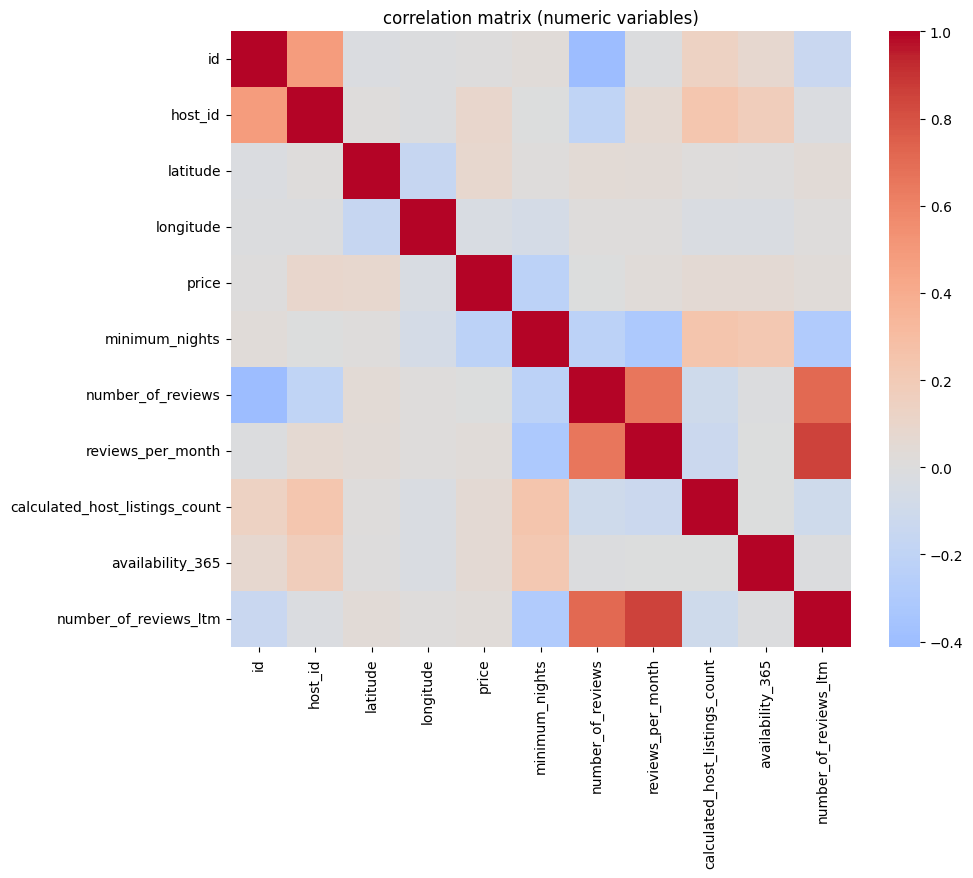

In [27]:
# Correlation heatmap (numeric variables)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    fig = plt.figure(figsize=(10,8))
    if sns:
        sns.heatmap(corr, cmap="coolwarm", center=0)
    else:
        plt.imshow(corr, interpolation="nearest")
        plt.xticks(range(len(num_cols)), num_cols, rotation=90)
        plt.yticks(range(len(num_cols)), num_cols)
        plt.colorbar()
    plt.title("correlation matrix (numeric variables)")
    savefig(OUT_FIG_DIR / "correlation_heatmap.png")
    plt.show()

## 8. Interactive Maps

Creating interactive maps to visualize the spatial distribution of listings and prices across Berlin.

In [28]:
# Interactive graph (Folium) — dots with price info
import folium
has_coords = {"latitude","longitude","price"}.issubset(df.columns)
if has_coords and len(df) > 0:
    lat0 = df["latitude"].median()
    lon0 = df["longitude"].median()
    m = folium.Map(location=[lat0, lon0], zoom_start=11, control_scale=True)

    # samples for performance
    sample = df.sample(min(500, len(df)), random_state=42)

    # normalized radius: 3..10, clipping extreme prices (98%-Quantil)
    p = sample["price"].clip(upper=sample["price"].quantile(0.98))
    r = 3 + 7 * (p - p.min()) / (max(1e-6, (p.max() - p.min())))
    
    # Color mapping: yellow (low) -> orange (mid) -> red (high)
    import matplotlib.colors as mcolors
    import matplotlib.cm as cm
    
    # Normalize prices for color mapping
    p_norm = (p - p.min()) / (p.max() - p.min()) if p.max() > p.min() else 0
    
    # Create yellow-orange-red colormap
    colors = ['yellow', 'orange', 'red']
    n_bins = 100
    cmap = mcolors.LinearSegmentedColormap.from_list('price_map', colors, N=n_bins)

    for (_, row), rad, price_norm in zip(sample.iterrows(), r, p_norm):
        # Get color for this price point
        rgba = cmap(price_norm)
        hex_color = mcolors.to_hex(rgba)
        
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=float(rad),
            popup=f"€{row['price']:.0f} – {row.get('room_type','')}",
            fill=True,
            color=hex_color,
            fillColor=hex_color,
            opacity=0.6,
            fill_opacity=0.6
        ).add_to(m)

    map_path = OUT_MAP_DIR / "berlin_price_points.html"
    m.save(str(map_path))
    print("Interactive map saved:", map_path)
else:
    print("missing column or data (latitude/longitude/price).")

Interactive map saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\maps\berlin_price_points.html


### 8.1 Choropleth Map

In [29]:
# Choropleth by district (avg price)
geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/berlin.geojson"

if {"neighbourhood_group","price"}.issubset(df.columns):
    # aggregate
    avg_price = (df.groupby("neighbourhood_group")["price"]
                   .mean()
                   .reset_index()
                   .rename(columns={"neighbourhood_group":"name","price":"avg_price"}))
    # simple name normalization to match GeoJSON ("Mitte", "Pankow", ...)
    avg_price["name"] = avg_price["name"].astype(str).str.strip().str.title()

    try:
        import requests, folium
        gj = requests.get(geojson_url, timeout=20).json()

        # center
        lat0 = df["latitude"].median() if "latitude" in df.columns else 52.52
        lon0 = df["longitude"].median() if "longitude" in df.columns else 13.405
        m = folium.Map(location=[lat0, lon0], zoom_start=10, control_scale=True)

        folium.Choropleth(
            geo_data=gj,
            data=avg_price,
            columns=["name","avg_price"],
            key_on="feature.properties.name",
            fill_opacity=0.7,
            line_opacity=0.3,
            legend_name="Average price (€)"
        ).add_to(m)

        folium.GeoJson(
            gj,
            name="Districts",
            tooltip=folium.features.GeoJsonTooltip(fields=["name"], aliases=["District:"])
        ).add_to(m)

        out_path = OUT_MAP_DIR / "berlin_price_choropleth.html"
        m.save(str(out_path))
        print("Choropleth saved:", out_path)
    except ModuleNotFoundError:
        print("ℹ️ Please install: pip install folium requests")
else:
    print("!! Columns 'neighbourhood_group' and 'price' required for choropleth.")

Choropleth saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\maps\berlin_price_choropleth.html


## 9. Spatial Analysis with GeoPandas

Advanced spatial analysis using GeoPandas for more sophisticated geographical visualizations.

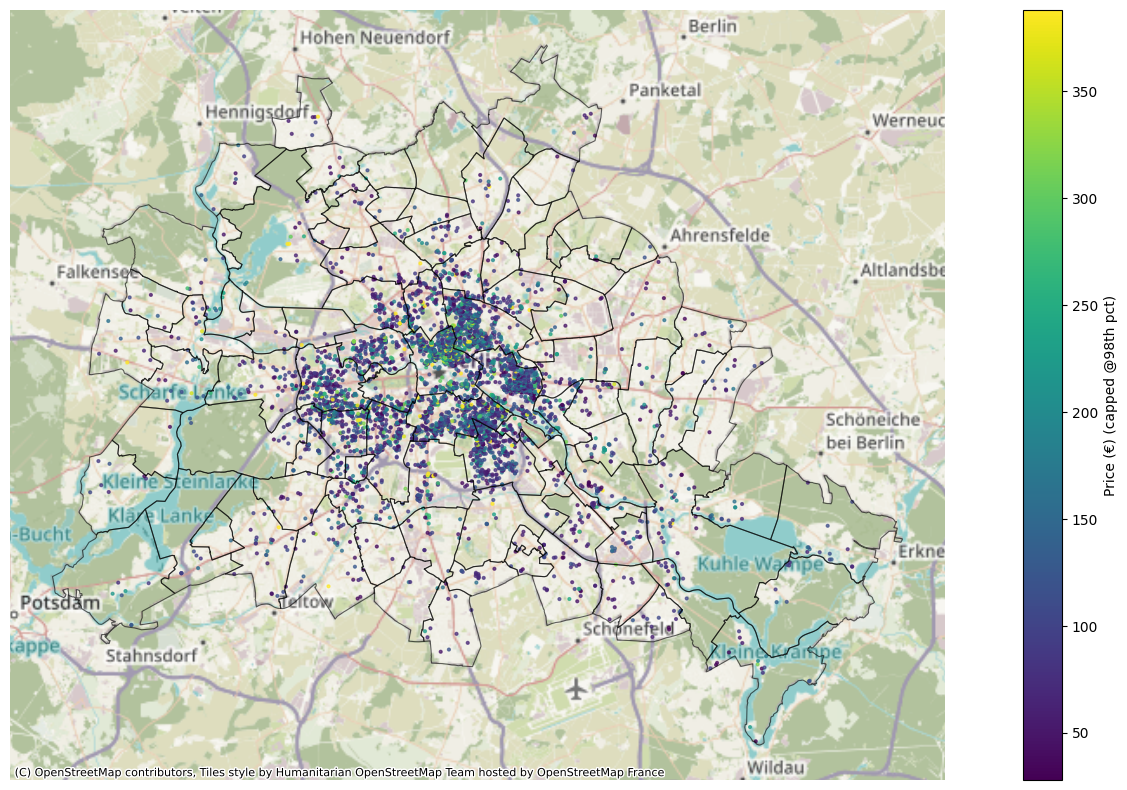

Saved: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures\geopandas_price_points.png


In [ ]:
# GeoPandas spatial analysis
try:
    import geopandas as gpd
    import contextily as cx
    from matplotlib.colors import LinearSegmentedColormap
except ImportError as e:
    print(f"⚠️ Missing required libraries: {e}")
    print("Please install: pip install geopandas contextily")
    
pts = df.copy()
if len(pts) == 0:
    print("!! No data available.")
else:
    pts = pts.sample(min(5000, len(pts)), random_state=42)  # subsample for speed
    gdf_pts = gpd.GeoDataFrame(
        pts[["price"]].copy(),                                          # Data columns
        geometry=gpd.points_from_xy(pts["longitude"], pts["latitude"]), # Geometry column
        crs="EPSG:4326"                                                 # Coordinate reference system
    ).to_crs(3857)

    # load berlin boundary (districts) and dissolve into one polygon
    gdf_b = gpd.read_file(geojson_url).to_crs(3857)
    berlin_poly = gdf_b.dissolve().geometry.iloc[0]

    # clip to berlin (optional but cleaner)
    gdf_pts = gpd.clip(gdf_pts, berlin_poly)

    # cap prices for color scaling
    p95 = gdf_pts["price"].quantile(0.98)
    gdf_pts["price_capped"] = np.clip(gdf_pts["price"], None, p95)

    # Create yellow-orange-red colormap
    colors_yor = ['yellow', 'orange', 'red']
    cmap_yor = LinearSegmentedColormap.from_list('price_map', colors_yor, N=100)

    # plot
    fig, ax = plt.subplots(figsize=(16,8))
    gdf_b.boundary.plot(ax=ax, linewidth=0.8, color="black", alpha=0.6)
    gdf_pts.plot(
        ax=ax, column="price_capped", cmap=cmap_yor,
        markersize=4, alpha=0.7, legend=True,
        legend_kwds={"label": "Price (€) (capped @98th pct)"}
    )
    cx.add_basemap(ax, crs=gdf_pts.crs)  # web basemap
    ax.set_axis_off()
    fig.tight_layout()

    out_path = OUT_FIG_DIR / "geopandas_price_points.png"
    fig.savefig(out_path, dpi=180)
    plt.show()
    print("Saved:", out_path)

## 10. Export Results and Summary Tables

Generating CSV reports and summary tables for further analysis.

In [31]:
# Save summary tables (csv)
out_tbl1 = PROJECT_ROOT / "reports" / "tables"
out_tbl1.mkdir(parents=True, exist_ok=True)

# Top 15 neighbourhoods by avg price
if {"neighbourhood_group","price"}.issubset(df.columns):
    top_price_neigh = (df.groupby("neighbourhood_group")["price"]
                         .mean().sort_values(ascending=False).head(15))
    top_price_neigh.to_csv(out_tbl1 / "top15_neighbourhoods_avg_price.csv")
    print("saved: top15_neighbourhoods_avg_price.csv")

# Host listings analysis tables
if "calculated_host_listings_count" in df.columns:
    # Save host listings summary by room type
    if "room_type" in df.columns:
        host_room_summary = df.groupby('room_type').agg({
            'calculated_host_listings_count': ['mean', 'median', 'count'],
            'price': 'mean'
        }).round(2)
        host_room_summary.to_csv(out_tbl1 / "host_listings_by_room_type.csv")
        print("saved: host_listings_by_room_type.csv")
    
    # Save host listings summary by neighbourhood
    if "neighbourhood_group" in df.columns:
        host_neigh_summary = df.groupby('neighbourhood_group').agg({
            'calculated_host_listings_count': ['mean', 'median', 'count'],
            'price': 'mean'
        }).round(2).sort_values(('calculated_host_listings_count', 'mean'), ascending=False)
        host_neigh_summary.to_csv(out_tbl1 / "host_listings_by_neighbourhood.csv")
        print("saved: host_listings_by_neighbourhood.csv")

# Final summary
print(f"\nVisualization complete!")
print(f"📊 Graphics saved to: {OUT_FIG_DIR}")
print(f"🗺️ Maps saved to: {OUT_MAP_DIR}")
print(f"📋 Tables saved to: {out_tbl1}")

saved: top15_neighbourhoods_avg_price.csv
saved: host_listings_by_room_type.csv
saved: host_listings_by_neighbourhood.csv

Visualization complete!
📊 Graphics saved to: C:\Users\seewi\Projects\AirBnB-Berlin\output\figures
🗺️ Maps saved to: C:\Users\seewi\Projects\AirBnB-Berlin\output\maps
📋 Tables saved to: C:\Users\seewi\Projects\AirBnB-Berlin\reports\tables


## 📊 Visual Analysis Conclusions

### Key Findings Summary

#### **1. Price Distribution Patterns**
- **Price Range**: Berlin Airbnb listings show a wide price distribution with most listings concentrated in the €20-150 range
- **Log-Normal Distribution**: Price distribution follows a log-normal pattern, indicating a few high-priced premium listings skew the average
- **Room Type Impact**: Entire homes/apartments command significantly higher prices than private or shared rooms

#### **2. Geographical Insights**
- **Neighborhood Premium**: Central districts (Mitte, Friedrichshain-Kreuzberg) show higher average prices reflecting their tourist appeal
- **Listing Concentration**: Tourist-heavy areas have higher listing densities, suggesting market saturation in popular zones
- **Spatial Price Gradient**: Clear price gradients from city center outward, with peripheral areas offering more affordable options

#### **3. Host Behavior Analysis**
- **Multi-listing Hosts**: A significant portion of listings are managed by hosts with multiple properties, indicating commercial operations
- **Professional vs. Casual**: Hosts with 3+ listings likely represent professional/commercial operators rather than casual home-sharers
- **Room Type Specialization**: Multi-listing hosts tend to focus on entire apartments, suggesting investment property strategies

#### **4. Market Dynamics**
- **Review Activity**: Higher host listing counts correlate with different review patterns, possibly indicating operational efficiency differences
- **Neighborhood Specialization**: Some neighborhoods attract more multi-listing hosts, suggesting targeted investment strategies
- **Price-Quality Relationship**: Correlation analysis reveals relationships between pricing, location, and host professionalism

#### **5. Spatial Distribution Patterns**
- **Clustering Effects**: Listings cluster around transportation hubs and tourist attractions
- **District Characteristics**: Each district shows unique pricing and listing characteristics reflecting local market conditions
- **Accessibility Impact**: Proximity to public transport and attractions directly influences listing prices and density

### **Business Implications**

1. **For Investors**: Central locations command premium prices but face higher competition
2. **For Regulators**: High concentration of multi-listing hosts in certain areas may indicate commercial gentrification
3. **For Travelers**: Price-conscious visitors can find value in peripheral neighborhoods with good transport links
4. **For Platform**: Understanding host behavior patterns can inform policy and recommendation systems

### **Technical Notes**
- Analysis based on cleaned dataset with outliers removed (1st-99th percentile price range)
- Geographical analysis limited to listings with valid coordinates
- Statistical relationships may be influenced by seasonal effects not captured in this snapshot
- Interactive maps and detailed correlation matrices provide deeper insights beyond summary statistics

*This analysis provides a comprehensive view of Berlin's Airbnb market structure, revealing both economic patterns and spatial distributions that characterize the short-term rental landscape.*